In [2]:
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, log_loss
import gensim
from gensim import corpora
from gensim.models import LdaModel, LdaMulticore
from gensim.utils import simple_preprocess, lemmatize
from nltk.corpus import stopwords

from gensim.models.word2vec import Word2Vec
from multiprocessing import cpu_count
import gensim.downloader as api

# Echo

In [33]:
with open('Saved Models/echo.pkl','rb') as read_file:
    echo = pickle.load(read_file)

In [34]:
echo.head()

,rating,date,variation,verified_reviews,feedback,review_length,new_reviews,sentiment,model
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,love echo,positive,echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,love,positive,echo
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,sometimes play game answer question correctly ...,positive,echo
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,lot fun thing 4 yr old learn dinosaur control ...,positive,echo
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,music,positive,echo


## WordCloud

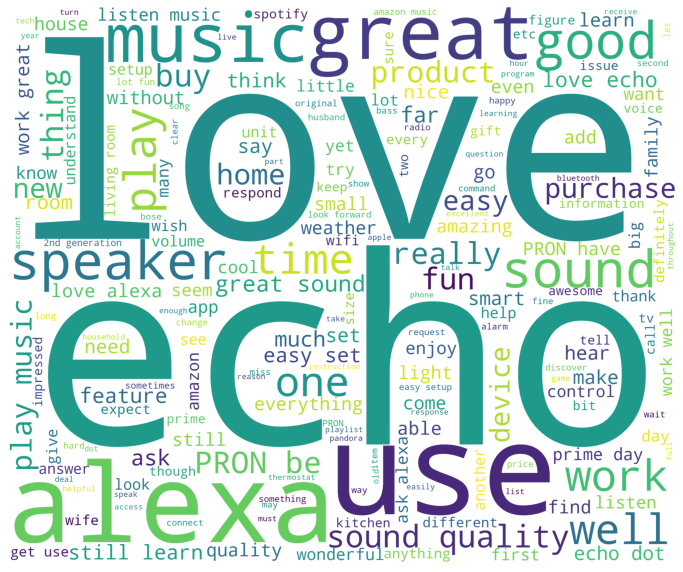

In [36]:
corpus_cloud = ' '.join(echo['new_reviews'])
STOPWORDS.update(['PRON','would','also','’s'])
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white',width=2400,height=2000).generate(corpus_cloud)
plt.figure(figsize=(12,15))
plt.imshow(wordcloud)
plt.axis('off')

plt.savefig("Photos/echo_wordcloud.jpg")
plt.show()

# Corpus

In [37]:
# CREATE DICTIONARY TO COUNT THE WORDS
count_dict_alex = {}

for doc in echo['new_reviews']:
    for word in doc.split():
        if word in count_dict_alex.keys():
            count_dict_alex[word] +=1
        else:
            count_dict_alex[word] = 1
            
for key, value in sorted(count_dict_alex.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

yr: 1
dinosaur: 1
category: 1
capabilitie: 1
accessible: 2
cellphone: 2
ipad: 2
r: 2
deaf: 2
herit: 2
smartbon: 2
politic: 2
5th: 2
specifily: 2
childhood: 2
85: 2
eveyday: 2
mother: 2
knee: 2
didshe: 2
doalexa: 2
hate: 2
toy: 2
member: 2
featue: 2
benefit: 2
liked: 2
shorter: 2
fabriccolor: 2
plusminus: 2
w: 2
comfort: 2
standard: 2
usb: 2
port: 2
instead: 2
previous: 2
round: 2
pin: 2
guess: 2
alexaechocomputer: 2
major: 2
itune: 2
anypod: 2
rely: 2
custom: 2
usessometime: 2
frustrating: 2
playing: 2
intrusive: 2
immediately: 2
load: 2
funit: 2
test: 2
alexas: 2
knowledge: 2
capabilitiesbut: 2
owner: 2
tashas: 2
definition: 2
followed: 2
synche: 2
primary: 2
motivation: 2
compare: 2
ship: 2
chargeable: 2
mobile: 2
utube: 2
digital: 2
assistant: 2
review: 2
cheap: 2
end: 2
itwhat: 2
number: 2
android: 2
fortunately: 2
sister: 2
fix: 2
glitch: 2
run: 2
certain: 2
broadway: 2
ne: 2
satisfied: 2
controls: 2
jimmy: 2
buffet: 2
accurately: 2
bargain: 2
ton: 2
plusprimeetc: 2
excelente: 2
l

In [38]:
# REMOVE WORDS THAT OCCUR LESS THAN 10 TIMES
low_value = 10
bad_words = [key for key in count_dict_alex.keys() if count_dict_alex[key] < low_value]

In [39]:
# CREATE A LIST OF LISTS - EACH DOCUMENT IS A STRING BROKEN INTO A LIST OF WORDS
corpus = [doc.split() for doc in echo['new_reviews']]
clean_list = []
for document in corpus:
    clean_list.append([word for word in document if word not in bad_words])

In [12]:
clean_list

[['love', 'echo'],
 ['love'],
 ['sometimes',
  'play',
  'answer',
  'question',
  'alexa',
  'say',
  'get',
  'answer',
  'like',
  'able',
  'turn',
  'light',
  'home'],
 ['lot',
  'fun',
  'thing',
  'learn',
  'control',
  'light',
  'play',
  'like',
  'nice',
  'sound',
  'play',
  'music',
  'well'],
 ['music'],
 ['echo',
  'gift',
  'need',
  'another',
  'something',
  'play',
  'music',
  'find',
  'smart',
  'speaker',
  'can',
  'not',
  'wait',
  'see',
  'else'],
 ['without',
  'can',
  'not',
  'use',
  'many',
  'feature',
  'see',
  'use',
  'great',
  'alarm',
  'hear',
  'alarm',
  'bedroom',
  'living',
  'room',
  'keep',
  'fun',
  'ask',
  'question',
  'hear',
  'seem',
  'yet'],
 ['think',
  'one',
  '-PRON-',
  'have',
  'purchase',
  '-PRON-',
  'be',
  'work',
  'get',
  'one',
  'every',
  'room',
  'house',
  'really',
  'like',
  'feature',
  'play',
  'music',
  'echo',
  'control',
  'light',
  'house'],
 ['look', 'great'],
 ['love',
  '-PRON-',
  'ha

In [40]:
# USE CLEAN_LIST TO CREATE CORPUS
corpus=[]
for item in clean_list:
    item = ' '.join(item)
    corpus.append(item)
    
corpus

['love echo',
 'love',
 'sometimes play answer question alexa say get answer like able turn light home',
 'lot fun thing learn control light play like nice sound play music well',
 'music',
 'echo gift need another something play music find smart speaker can not wait see else',
 'without can not use many feature see use great alarm hear alarm bedroom living room keep fun ask question hear seem yet',
 'think one -PRON- have purchase -PRON- be work get one every room house really like feature play music echo control light house',
 'look great',
 'love -PRON- have listen song have not hear since get news weather information great',
 '',
 'love know thing still figure everything work far easy use understand make time',
 'purchase give something try come get like enjoy little big thing play song time',
 'love love love',
 'expect',
 'love wife',
 'really happy purchase great speaker easy set',
 'use alexa day lot fun new like new try learn different come',
 'love size 2nd generation echo st

# LDA

In [42]:
clean_list[0][:5]

['love', 'echo']

In [43]:
# CREATE THE INPUTS OF LDA MODEL: DICTIONARY AND CORPUS
corpora_dict = corpora.Dictionary(clean_list)
corpus = [corpora_dict.doc2bow(line) for line in clean_list]

In [44]:
# TRAIN THE LDA MODEL
lda_model = LdaModel(corpus=corpus,
                         id2word=corpora_dict,
                         random_state=100,
                         num_topics=3,
                         passes=5,
                         per_word_topics=True)

# See the topics
lda_model.print_topics(-1)

[(0,
  '0.045*"not" + 0.044*"great" + 0.044*"sound" + 0.034*"use" + 0.031*"like" + 0.028*"work" + 0.024*"easy" + 0.024*"well" + 0.022*"set" + 0.022*"echo"'),
 (1,
  '0.059*"echo" + 0.055*"love" + 0.044*"alexa" + 0.043*"music" + 0.026*"get" + 0.026*"use" + 0.023*"like" + 0.019*"sound" + 0.018*"play" + 0.016*"good"'),
 (2,
  '0.038*"great" + 0.035*"-PRON-" + 0.034*"love" + 0.033*"music" + 0.028*"speaker" + 0.028*"echo" + 0.025*"sound" + 0.024*"one" + 0.023*"good" + 0.023*"be"')]

# Word2Vec

In [45]:
# Train Word2Vec model. Defaults result vector size = 100
model = Word2Vec(clean_list, min_count = 0, workers=cpu_count())

# Get the word vector for given word
model['sound']

model.most_similar('sound')

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys


[('speaker', 0.9996077418327332),
 ('not', 0.9995959401130676),
 ('ask', 0.999515950679779),
 ('like', 0.9995137453079224),
 ('get', 0.9995131492614746),
 ('without', 0.9995097517967224),
 ('echo', 0.9995080232620239),
 ('play', 0.9995066523551941),
 ('great', 0.9995047450065613),
 ('music', 0.9994905591011047)]

# Bigram

In [46]:
dct = corpora.Dictionary(clean_list)
corpus = [dct.doc2bow(line) for line in clean_list]

# Build the bigram models
bigram = gensim.models.phrases.Phrases(clean_list, min_count=3, threshold=10)

# Construct bigram
print(bigram[clean_list[1]])

['love']


# Vader

In [73]:
analyser = SentimentIntensityAnalyzer()

In [48]:
def sentimentScore(sentences):
    analyzer = SentimentIntensityAnalyzer()
    results = []
    for sentence in sentences:
        vs = analyzer.polarity_scores(sentence)
        print(str(vs))
        results.append(vs) 
    return results

In [137]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

def sentimentScore(sentences):
    analyzer = SentimentIntensityAnalyzer()
    results = []
    for sentence in sentences:
        vs = analyzer.polarity_scores(sentence)
        print(str(vs))
        results.append(vs) 
    return results

In [141]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print(str(score))

In [142]:
sentiment_analyzer_scores("Alexa was the worst purchase")

{'neg': 0.506, 'neu': 0.494, 'pos': 0.0, 'compound': -0.6249}


In [140]:
sentiment = sentiment_analyzer_scores(echo['verified_reviews'])


TypeError: unsupported format string passed to Series.__format__

In [80]:
sentiment = sentiment_analyzer_scores(echo['verified_reviews'])


TypeError: unsupported format string passed to Series.__format__

In [62]:
sentiment_df = pd.DataFrame(sentiment)
sentiment_df.head()

,neg,neu,pos,compound
0,0.000,0.308,0.692,0.6696
1,0.000,0.193,0.807,0.6360
2,0.095,0.799,0.106,-0.1280
3,0.000,0.653,0.347,0.9169
4,0.000,1.000,0.000,0.0000


In [63]:
# align index to copy rating column for joining
echo.index = sentiment_df.index
sentiment_df['rating'] = echo['rating']
echo_vader = pd.concat([echo, sentiment_df], axis=1)
echo_vader.head()

,rating,date,variation,verified_reviews,feedback,review_length,new_reviews,sentiment,model,neg,neu,pos,compound,rating
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,love echo,positive,echo,0.000,0.308,0.692,0.6696,5
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,love,positive,echo,0.000,0.193,0.807,0.6360,5
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,sometimes play game answer question correctly ...,positive,echo,0.095,0.799,0.106,-0.1280,4
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,lot fun thing 4 yr old learn dinosaur control ...,positive,echo,0.000,0.653,0.347,0.9169,5
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,music,positive,echo,0.000,1.000,0.000,0.0000,5


In [64]:
echo_vader[echo_vader['sentiment']=='negative']

,rating,date,variation,verified_reviews,feedback,review_length,new_reviews,sentiment,model,neg,neu,pos,compound,rating
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1,365,without cellphone can not use many feature ipa...,negative,echo,0.071,0.813,0.116,0.7096,3
24,3,30-Jul-18,Sandstone Fabric,"I got a second unit for the bedroom, I was exp...",1,179,get second unit bedroom expecting sound improv...,negative,echo,0.086,0.859,0.055,-0.2892,3
33,3,30-Jul-18,Heather Gray Fabric,The speakers sound pretty good for being so sm...,1,308,speaker sound pretty good small setup pretty e...,negative,echo,0.000,0.823,0.177,0.8481,3
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163,like siri fact siri answer accurately alexa do...,negative,echo,0.000,0.801,0.199,0.7351,2
49,3,30-Jul-18,Charcoal Fabric,No different than Apple. To play a specific li...,1,208,different apple play specific list music must ...,negative,echo,0.082,0.781,0.137,0.3892,3
54,3,30-Jul-18,Sandstone Fabric,like google better,1,18,like google well,negative,echo,0.000,0.156,0.844,0.6597,3
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53,sound terrible u want good music get bose,negative,echo,0.190,0.552,0.258,0.0258,2
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18,much feature,negative,echo,0.000,1.000,0.000,0.0000,1
145,3,30-Jul-18,Sandstone Fabric,it's annoying that everything they show Alexa ...,1,211,annoy everything show alexa able download spen...,negative,echo,0.060,0.893,0.047,-0.1531,3
150,3,30-Jul-18,Heather Gray Fabric,Doesn't know half the things asked. Can't reco...,1,284,do not know half thing ask can not recognize s...,negative,echo,0.000,0.964,0.036,0.1779,3


# Sentiment Features

In [52]:
neg_alexa = echo[echo['sentiment']=='negative']
pos_alexa = echo[echo['sentiment']=='positive']

## Negative

In [53]:
from sklearn.feature_selection import chi2

tfidf_n = TfidfVectorizer(ngram_range=(2, 2))
X_tfidf_n = tfidf_n.fit_transform(neg_alexa['new_reviews'])
y_n = neg_alexa['rating']
chi2score_n = chi2(X_tfidf_n, y_n)[0]

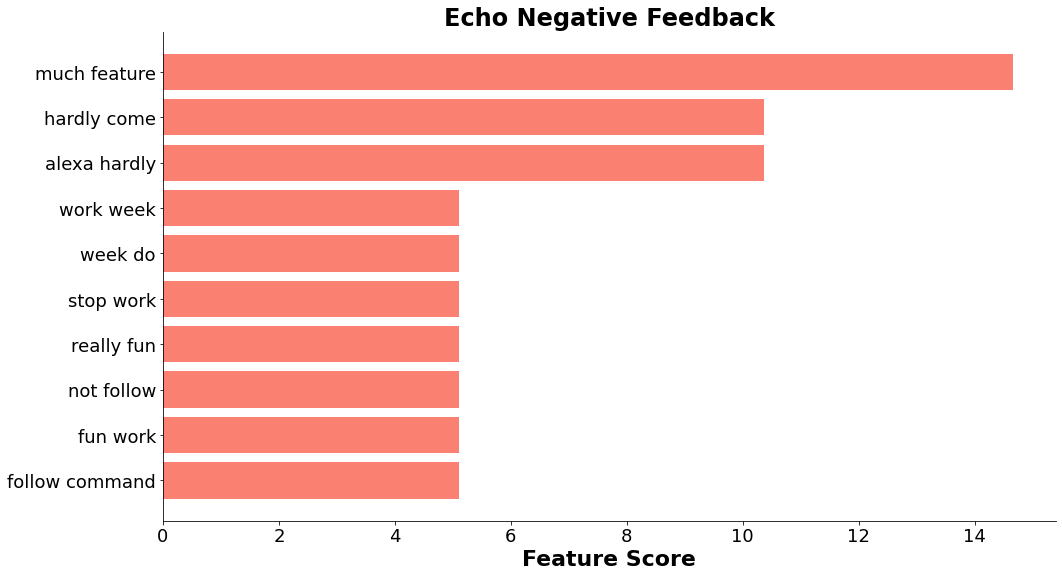

''

<Figure size 432x288 with 0 Axes>

In [54]:
scores = list(zip(tfidf_n.get_feature_names(), chi2score_n))
chi2_n = sorted(scores, key=lambda x:x[1])
topchi2_n = list(zip(*chi2_n[-10:]))
x_n=range(len(topchi2_n[1]))

fig, ax = plt.subplots(figsize=(16,9))
ax.barh(x_n, topchi2_n[1], align='center', alpha=1, color='salmon')

plt.title('Echo Negative Feedback', fontsize=24, weight='bold')

# x-axis
plt.xlabel("Feature Score", fontsize=22, weight='bold')
plt.xticks(fontsize=18)

#y-axis
labels = topchi2_n[0]
plt.yticks(x_n, labels, fontsize=18)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

fig = plt.gcf()
plt.show()
plt.draw()

fig.savefig('Photos/echo_neg.jpg')
;

## Positive

In [40]:
tfidf = TfidfVectorizer(ngram_range=(2, 2))
X_tfidf = tfidf.fit_transform(pos_alexa['new_reviews'])
y = pos_alexa['rating']
chi2score = chi2(X_tfidf, y)[0]

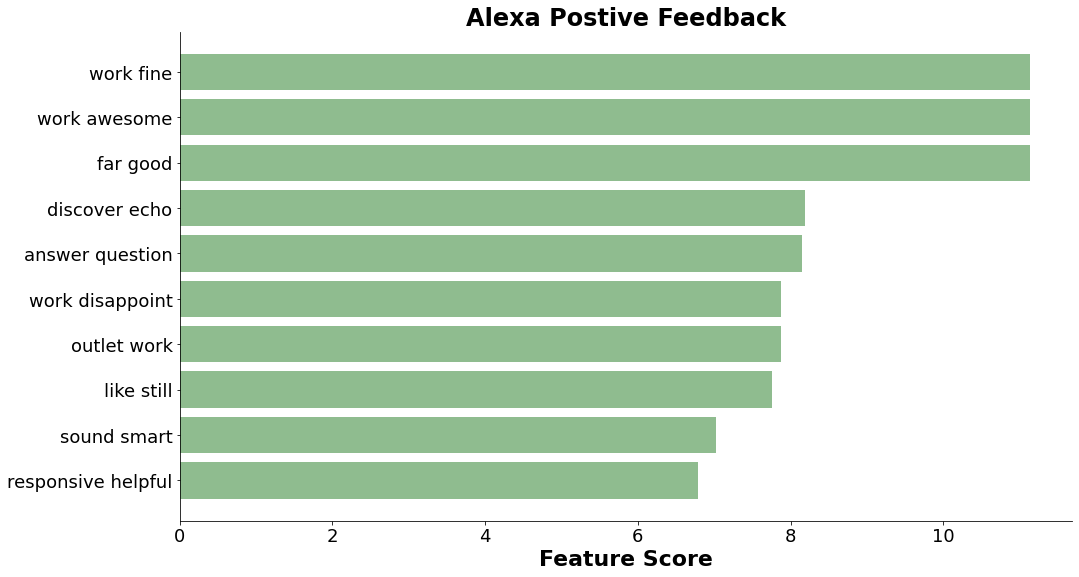

''

<Figure size 432x288 with 0 Axes>

In [41]:
scores = list(zip(tfidf.get_feature_names(), chi2score))
chi2 = sorted(scores, key=lambda x:x[1])
topchi2 = list(zip(*chi2[-10:]))
x=range(len(topchi2[1]))

fig, ax = plt.subplots(figsize=(16,9))
ax.barh(x,topchi2[1], alpha=1, color='darkseagreen')

plt.title('Echo Postive Feedback', fontsize=24, weight='bold')

# x-axis
plt.xlabel("Feature Score", fontsize=22, weight='bold')
plt.xticks(fontsize=18)

#y-axis
labels = topchi2[0]
plt.yticks(x, labels, fontsize=18)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

fig = plt.gcf()
plt.show()
plt.draw()

fig.savefig('Photos/echo_positive.jpg')
;

# Echo Dot

In [45]:
with open('Saved Models/echodot.pkl','rb') as read_file:
    echodot = pickle.load(read_file)

In [46]:
echodot.head()

,rating,date,variation,verified_reviews,feedback,review_length,new_reviews,sentiment,model
350,1,31-Jul-18,Black,Item no longer works after just 5 months of us...,0,109,item long work 5 month use connect wifi unresp...,negative,echo dot
351,5,30-Jul-18,Black,I love the Echo Dot. So easy. So fun. I get to...,1,143,love echo dot easy fun get drop grandaughter l...,positive,echo dot
352,5,30-Jul-18,Black,Works great no different than the new ones,1,42,work great different new one,positive,echo dot
353,5,30-Jul-18,Black,This one's going in the kitchen for timer/musi...,1,53,one go kitchen timermusic duty,positive,echo dot
354,4,30-Jul-18,White,Love it but the volume could definitely use a ...,1,250,love volume could definitely use boost well bu...,positive,echo dot


## WordCloud

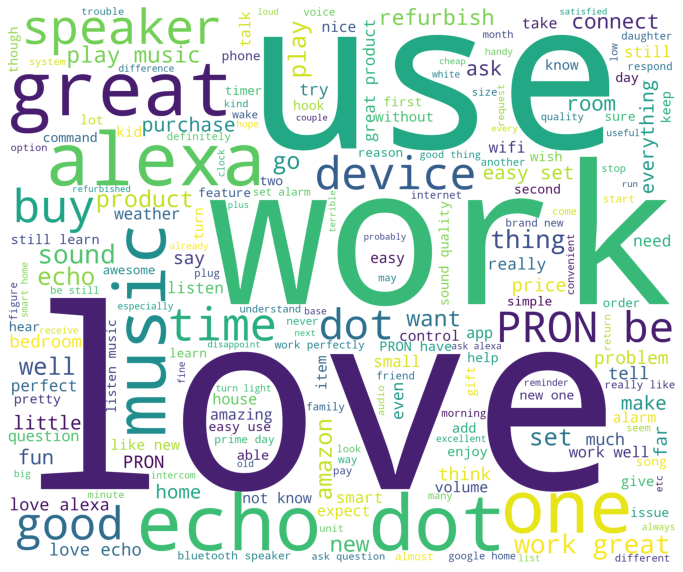

In [47]:
corpus_cloud = ' '.join(echodot['new_reviews'])
STOPWORDS.update(['PRON','would','also','’s'])
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white',width=2400,height=2000).generate(corpus_cloud)
plt.figure(figsize=(12,15))
plt.imshow(wordcloud)
plt.axis('off')

plt.savefig("Photos/echodot_wordcloud.jpg")
plt.show()

# Corpus

In [48]:
# CREATE DICTIONARY TO COUNT THE WORDS
count_dict_alex = {}

for doc in echodot['new_reviews']:
    for word in doc.split():
        if word in count_dict_alex.keys():
            count_dict_alex[word] +=1
        else:
            count_dict_alex[word] = 1
            
for key, value in sorted(count_dict_alex.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

grandaughter: 1
2000: 1
mile: 1
timermusic: 1
duty: 1
boost: 1
definitively: 1
ahead: 1
input: 1
dedicated: 1
prove: 1
main: 1
relax: 1
purchasing: 1
select: 1
asap: 1
waste: 1
picture: 1
cordless: 1
purpose: 1
5th: 1
act: 1
encyclopedia: 1
greatit: 1
nest: 1
thermostatand: 1
phillips: 1
hue: 1
lightswithout: 1
chair: 1
dislikes: 1
pauses: 1
pattern: 1
present: 1
spoken: 1
promp: 1
poop: 1
joke34: 1
besides: 1
naw: 1
techie: 1
store: 1
outsmart: 1
echosecho: 1
beautiful: 1
accessory: 1
6th: 1
divertido: 1
center: 1
1000: 1
prompt: 1
improvement: 1
speaknspell: 1
iove: 1
bite: 1
tinny: 1
soundgood: 1
fm: 1
software: 1
native: 1
americans: 1
whose: 1
english: 1
north: 1
texas: 1
birth: 1
area: 1
additionally: 1
marginal: 1
extender: 1
ten: 1
disconnected: 1
dust: 1
collector: 1
broken: 1
34fixes34: 1
accomplish: 1
satisfy: 1
rubber: 1
bottom: 1
unplug: 1
basement: 1
laundry: 1
wait: 1
34never: 1
34certified: 1
acknowledge: 1
indicate: 1
perfectlyvery: 1
productsand: 1
journey: 1
daytoday

In [49]:
# REMOVE WORDS THAT OCCUR LESS THAN 10 TIMES
low_value = 10
bad_words = [key for key in count_dict_alex.keys() if count_dict_alex[key] < low_value]

In [50]:
# CREATE A LIST OF LISTS - EACH DOCUMENT IS A STRING BROKEN INTO A LIST OF WORDS
corpus = [doc.split() for doc in echodot['new_reviews']]
clean_list = []
for document in corpus:
    clean_list.append([word for word in document if word not in bad_words])

In [51]:
clean_list

[['item', 'work', 'month', 'use', 'connect', 'wifi', 'request'],
 ['love',
  'echo',
  'dot',
  'easy',
  'fun',
  'get',
  'live',
  'sound',
  'like',
  'right',
  'next'],
 ['work', 'great', 'different', 'new', 'one'],
 ['one', 'go'],
 ['love',
  'volume',
  'could',
  'definitely',
  'use',
  'well',
  'speaker',
  'would',
  'star',
  'think',
  'audio',
  'buy',
  'speaker',
  'echo',
  'good',
  'way',
  'go'],
 ['work', 'fine'],
 ['work',
  'great',
  'look',
  'brand',
  'new',
  'love',
  'new',
  'echo',
  'dot',
  'get',
  'room',
  'house'],
 ['refurbished',
  'item',
  'work',
  'like',
  'new',
  'love',
  'easy',
  'set',
  'love',
  'issue',
  'volume',
  'listen',
  'fine',
  'expect',
  'recommend',
  'speaker'],
 ['loud'],
 ['2nd', 'one', 'love'],
 ['sure',
  'echo',
  'dot',
  'many',
  'thing',
  'need',
  'get',
  'use',
  'ask',
  'right',
  'question',
  'will',
  'not',
  'understand'],
 ['thing',
  'work',
  'app',
  '-PRON-',
  'think',
  'could',
  '-PRON-'

In [52]:
# USE CLEAN_LIST TO CREATE CORPUS
corpus=[]
for item in clean_list:
    item = ' '.join(item)
    corpus.append(item)
    
corpus

['item work month use connect wifi request',
 'love echo dot easy fun get live sound like right next',
 'work great different new one',
 'one go',
 'love volume could definitely use well speaker would star think audio buy speaker echo good way go',
 'work fine',
 'work great look brand new love new echo dot get room house',
 'refurbished item work like new love easy set love issue volume listen fine expect recommend speaker',
 'loud',
 '2nd one love',
 'sure echo dot many thing need get use ask right question will not understand',
 'thing work app -PRON- think could -PRON- be -PRON- money',
 'gift do not like plug would still work though buy',
 'amazon echo device purchase refurbish satisfied time different can not tell brand new price cheap echo wake -PRON- keep timer play music -PRON- turn light much',
 'small echo dot amazing sound come',
 'talk time song be not device',
 '-PRON- be never disappoint amazon',
 'work',
 'return 2 echo dot get return 2 one want',
 'work',
 'echo device

# LDA

In [53]:
import gensim
from gensim import corpora
from gensim.models import LdaModel, LdaMulticore
import gensim.downloader as api
from gensim.utils import simple_preprocess, lemmatize
from nltk.corpus import stopwords

In [54]:
clean_list[0][:5]

['item', 'work', 'month', 'use', 'connect']

In [55]:
# CREATE THE INPUTS OF LDA MODEL: DICTIONARY AND CORPUS
corpora_dict = corpora.Dictionary(clean_list)
corpus = [corpora_dict.doc2bow(line) for line in clean_list]

In [56]:
# TRAIN THE LDA MODEL
lda_model = LdaModel(corpus=corpus,
                         id2word=corpora_dict,
                         random_state=100,
                         num_topics=3,
                         passes=5,
                         per_word_topics=True)

# See the topics
lda_model.print_topics(-1)

[(0,
  '0.079*"great" + 0.073*"work" + 0.038*"new" + 0.036*"like" + 0.033*"product" + 0.027*"love" + 0.024*"music" + 0.023*"alexa" + 0.023*"buy" + 0.021*"good"'),
 (1,
  '0.035*"not" + 0.031*"echo" + 0.028*"-PRON-" + 0.027*"speaker" + 0.026*"work" + 0.025*"dot" + 0.022*"be" + 0.020*"get" + 0.020*"use" + 0.018*"device"'),
 (2,
  '0.090*"love" + 0.045*"music" + 0.030*"use" + 0.027*"play" + 0.025*"set" + 0.025*"dot" + 0.024*"echo" + 0.023*"get" + 0.021*"alexa" + 0.018*"one"')]

# Word2Vec

In [57]:
from gensim.models.word2vec import Word2Vec
from multiprocessing import cpu_count
import gensim.downloader as api

In [58]:
# Train Word2Vec model. Defaults result vector size = 100
model = Word2Vec(clean_list, min_count = 0, workers=cpu_count())

# Get the word vector for given word
model['sound']

model.most_similar('sound')

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys


[('-PRON-', 0.9998592734336853),
 ('echo', 0.9998441934585571),
 ('use', 0.9998420476913452),
 ('not', 0.9998373985290527),
 ('dot', 0.9998372197151184),
 ('get', 0.9998322129249573),
 ('great', 0.9998315572738647),
 ('would', 0.9998235702514648),
 ('music', 0.999823272228241),
 ('turn', 0.9998209476470947)]

# Bigram

In [59]:
dct = corpora.Dictionary(clean_list)
corpus = [dct.doc2bow(line) for line in clean_list]

# Build the bigram models
bigram = gensim.models.phrases.Phrases(clean_list, min_count=3, threshold=10)

# Construct bigram
print(bigram[clean_list[1]])

['love', 'echo', 'dot', 'easy', 'fun', 'get', 'live', 'sound', 'like', 'right', 'next']


# Vader

In [60]:
analyser = SentimentIntensityAnalyzer()

In [61]:
def sentimentScore(sentences):
    analyzer = SentimentIntensityAnalyzer()
    results = []
    for sentence in sentences:
        vs = analyzer.polarity_scores(sentence)
        print(str(vs))
        results.append(vs) 
    return results

In [62]:
sentiment = sentimentScore(echodot['new_reviews'])


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.081, 'neu': 0.423, 'pos': 0.496, 'compound': 0.8957}
{'neg': 0.0, 'neu': 0.494, 'pos': 0.506, 'compound': 0.6249}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.544, 'pos': 0.456, 'compound': 0.9485}
{'neg': 0.0, 'neu': 0.357, 'pos': 0.643, 'compound': 0.2023}
{'neg': 0.0, 'neu': 0.57, 'pos': 0.43, 'compound': 0.8519}
{'neg': 0.0, 'neu': 0.382, 'pos': 0.618, 'compound': 0.9638}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369}
{'neg': 0.0, 'neu': 0.859, 'pos': 0.141, 'compound': 0.3182}
{'neg': 0.114, 'neu': 0.776, 'pos': 0.11, 'compound': -0.0258}
{'neg': 0.105, 'neu': 0.75, 'pos': 0.145, 'compound': 0.1999}
{'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'compound': 0.7096}
{'neg': 0.067, 'neu': 0.722, 'pos': 0.211, 'compound': 0.5574}
{'neg': 0.0, 'neu': 0.727, 'pos': 0.273, 'compound': 0.3089}
{'neg': 0.195, 'neu': 0.514, 'pos': 0.29

{'neg': 0.0, 'neu': 0.421, 'pos': 0.579, 'compound': 0.6705}
{'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'compound': 0.6249}
{'neg': 0.0, 'neu': 0.871, 'pos': 0.129, 'compound': 0.4588}
{'neg': 0.068, 'neu': 0.535, 'pos': 0.397, 'compound': 0.8932}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6705}
{'neg': 0.0, 'neu': 0.655, 'pos': 0.345, 'compound': 0.3892}
{'neg': 0.07, 'neu': 0.737, 'pos': 0.193, 'compound': 0.5693}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.152, 'pos': 0.848, 'compound': 0.6808}
{'neg': 0.111, 'neu': 0.369, 'pos': 0.521, 'compound': 0.836}
{'neg': 0.0, 'neu': 0.724, 'pos': 0.276, 'compound': 0.6369}
{'neg': 0.0, 'neu': 0.23, 'pos': 0.77, 'compound': 0.7717}
{'neg': 0.0, 'neu': 0.265, 'pos': 0.735, 'compound': 0.8519}
{'neg': 0.0, 'neu': 0.519, 'pos': 0.481, 'compound': 0.5719}
{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'compound': 0.6249}
{'neg': 0.0, 'neu': 0.224, 'pos': 0.776,

In [63]:
sentiment_df = pd.DataFrame(sentiment)
sentiment_df.head()

,neg,neu,pos,compound
0,0.000,1.000,0.000,0.0000
1,0.081,0.423,0.496,0.8957
2,0.000,0.494,0.506,0.6249
3,0.000,1.000,0.000,0.0000
4,0.000,0.544,0.456,0.9485


In [64]:
# align index to copy rating column for joining
echodot.index = sentiment_df.index
sentiment_df['rating'] = echodot['rating']
echo_vader = pd.concat([echodot, sentiment_df], axis=1)
echo_vader.head()

,rating,date,variation,verified_reviews,feedback,review_length,new_reviews,sentiment,model,neg,neu,pos,compound,rating
0,1,31-Jul-18,Black,Item no longer works after just 5 months of us...,0,109,item long work 5 month use connect wifi unresp...,negative,echo dot,0.000,1.000,0.000,0.0000,1
1,5,30-Jul-18,Black,I love the Echo Dot. So easy. So fun. I get to...,1,143,love echo dot easy fun get drop grandaughter l...,positive,echo dot,0.081,0.423,0.496,0.8957,5
2,5,30-Jul-18,Black,Works great no different than the new ones,1,42,work great different new one,positive,echo dot,0.000,0.494,0.506,0.6249,5
3,5,30-Jul-18,Black,This one's going in the kitchen for timer/musi...,1,53,one go kitchen timermusic duty,positive,echo dot,0.000,1.000,0.000,0.0000,5
4,4,30-Jul-18,White,Love it but the volume could definitely use a ...,1,250,love volume could definitely use boost well bu...,positive,echo dot,0.000,0.544,0.456,0.9485,4


# Sentiment Features

In [68]:
neg_alexa = echodot[echodot['sentiment']=='negative']
pos_alexa = echodot[echodot['sentiment']=='positive']

## Negative

In [69]:
from sklearn.feature_selection import chi2

tfidf_n = TfidfVectorizer(ngram_range=(2, 2))
X_tfidf_n = tfidf_n.fit_transform(neg_alexa['new_reviews'])
y_n = neg_alexa['rating']
chi2score_n = chi2(X_tfidf_n, y_n)[0]

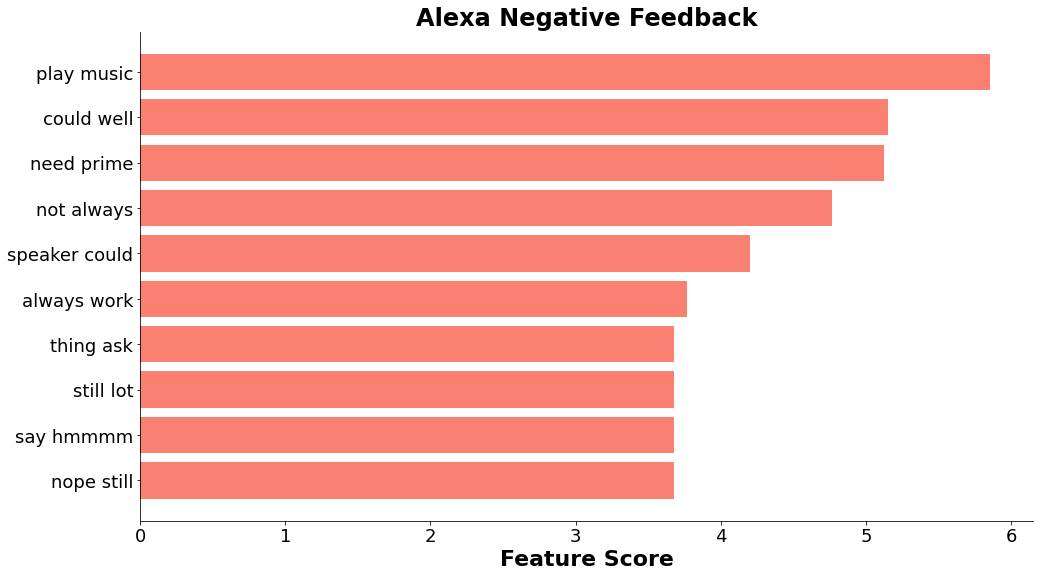

''

<Figure size 432x288 with 0 Axes>

In [70]:
scores = list(zip(tfidf_n.get_feature_names(), chi2score_n))
chi2_n = sorted(scores, key=lambda x:x[1])
topchi2_n = list(zip(*chi2_n[-10:]))
x_n=range(len(topchi2_n[1]))

fig, ax = plt.subplots(figsize=(16,9))
ax.barh(x_n, topchi2_n[1], align='center', alpha=1, color='salmon')

plt.title('Echo Dot Negative Feedback', fontsize=24, weight='bold')

# x-axis
plt.xlabel("Feature Score", fontsize=22, weight='bold')
plt.xticks(fontsize=18)

#y-axis
labels = topchi2_n[0]
plt.yticks(x_n, labels, fontsize=18)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

fig = plt.gcf()
plt.show()
plt.draw()

fig.savefig('Photos/echodot_neg.jpg')
;

## Positive

In [71]:
tfidf = TfidfVectorizer(ngram_range=(2, 2))
X_tfidf = tfidf.fit_transform(pos_alexa['new_reviews'])
y = pos_alexa['rating']
chi2score = chi2(X_tfidf, y)[0]

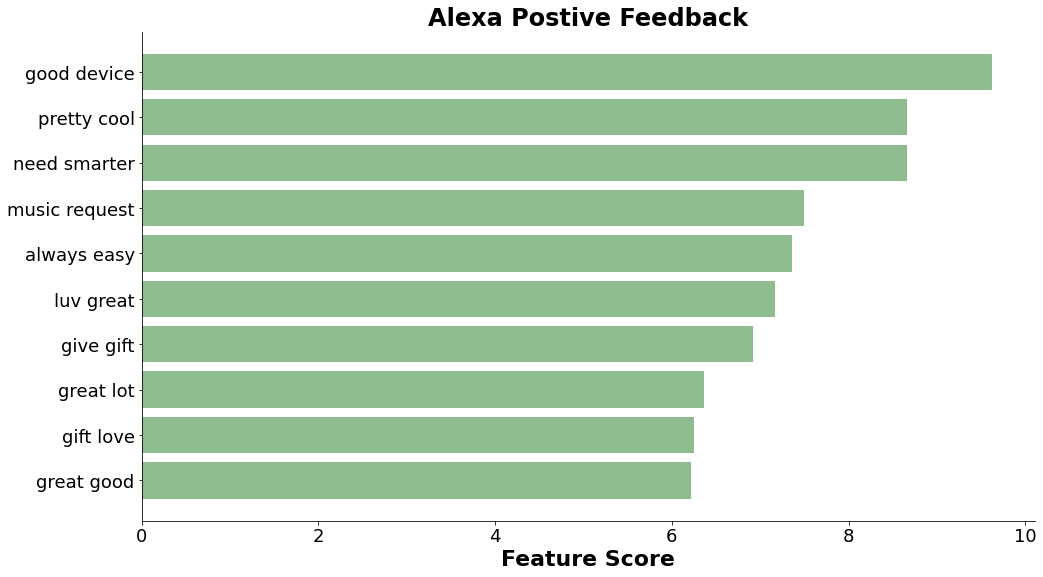

''

<Figure size 432x288 with 0 Axes>

In [72]:
scores = list(zip(tfidf.get_feature_names(), chi2score))
chi2 = sorted(scores, key=lambda x:x[1])
topchi2 = list(zip(*chi2[-10:]))
x=range(len(topchi2[1]))

fig, ax = plt.subplots(figsize=(16,9))
ax.barh(x,topchi2[1], alpha=1, color='darkseagreen')

plt.title('Echo Dot Postive Feedback', fontsize=24, weight='bold')

# x-axis
plt.xlabel("Feature Score", fontsize=22, weight='bold')
plt.xticks(fontsize=18)

#y-axis
labels = topchi2[0]
plt.yticks(x, labels, fontsize=18)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

fig = plt.gcf()
plt.show()
plt.draw()

fig.savefig('Photos/echodot_positive.jpg')
;

## Echo Show

In [3]:
with open('Saved Models/echoshow.pkl','rb') as read_file:
    echoshow = pickle.load(read_file)

In [4]:
echoshow.head()

,rating,date,variation,verified_reviews,feedback,review_length,new_reviews,sentiment,model
1400,5,31-Jul-18,Black Show,I love love love love it! I feel like I have ...,1,90,love love love love feel like talk computer te...,positive,echo show
1401,5,31-Jul-18,Black Show,Love the Echo Show. Being able to see the lyr...,1,137,love echo show able see lyric song play able p...,positive,echo show
1402,3,31-Jul-18,Black Show,It seems to work well. Unfortunately a lot of...,1,459,seem work well unfortunately lot functionality...,negative,echo show
1403,5,31-Jul-18,Black Show,Love listening to music. Still trying to learn...,1,66,love listen music still try learn everything,positive,echo show
1404,4,31-Jul-18,White Show,Very pleasedSimple to figure out,1,32,pleasedsimple figure,positive,echo show


## WordCloud

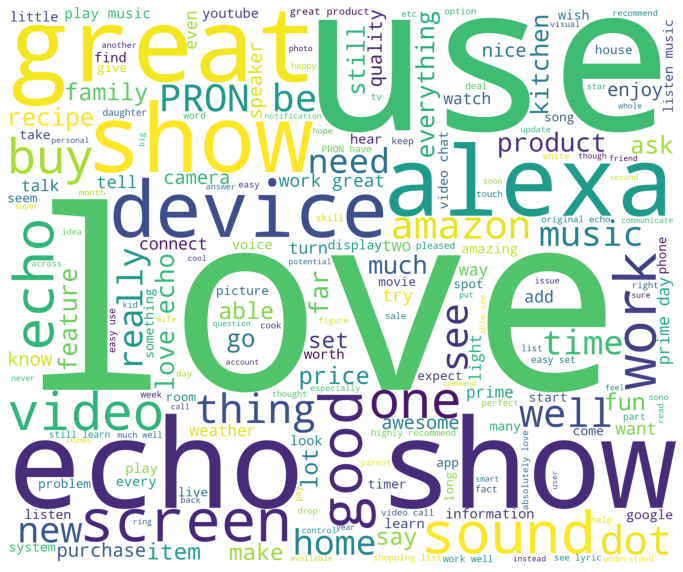

In [5]:
corpus_cloud = ' '.join(echoshow['new_reviews'])
STOPWORDS.update(['PRON','would','also','’s'])
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white',width=2400,height=2000).generate(corpus_cloud)
plt.figure(figsize=(12,15))
plt.imshow(wordcloud)
plt.axis('off')

plt.savefig("Photos/echoshow_wordcloud.jpg")
plt.show()

# Corpus

In [6]:
# CREATE DICTIONARY TO COUNT THE WORDS
count_dict_alex = {}

for doc in echoshow['new_reviews']:
    for word in doc.split():
        if word in count_dict_alex.keys():
            count_dict_alex[word] +=1
        else:
            count_dict_alex[word] = 1
            
for key, value in sorted(count_dict_alex.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

mention: 1
cause: 1
longer: 1
effect: 1
anyhow: 1
child: 1
hand: 1
pleasedsimple: 1
expectedalready: 1
aspect: 1
interact: 1
tremendous: 1
itiswhat: 1
ony: 1
dhiw: 1
hmm: 1
cnn: 1
preview: 1
name: 1
except: 1
nearly: 1
alone: 1
underestimate: 1
cart: 1
chatting: 1
image: 1
pixelate: 1
generation: 1
cycle: 1
slideshow: 1
mode: 1
matter: 1
online: 1
research: 1
article: 1
shutting: 1
known: 1
mexico: 1
usa: 1
us: 1
upgrade: 1
customize: 1
analog: 1
mimic: 1
toy: 1
ac: 1
bulbs: 1
baseball: 1
score: 1
cooler: 1
audiobook: 1
connection: 1
application: 1
optional: 1
conference: 1
bezos: 1
spy: 1
disposable: 1
income: 1
cat: 1
vacation: 1
wonderfully: 1
enjoying: 1
breeze: 1
shoppingto: 1
imhave: 1
sit: 1
tinny: 1
hate: 1
delete: 1
continually: 1
bed: 1
bc: 1
advertisement: 1
guide: 1
attractive: 1
prior: 1
script: 1
exchange: 1
excited: 1
bunch: 1
5: 1
everfloate: 1
purely: 1
hopefully: 1
shut: 1
trek: 1
natural: 1
mediocre: 1
instruction: 1
officeit: 1
busy: 1
track: 1
appointmentsi: 1
holi

In [7]:
# REMOVE WORDS THAT OCCUR LESS THAN 10 TIMES
low_value = 10
bad_words = [key for key in count_dict_alex.keys() if count_dict_alex[key] < low_value]

In [8]:
# CREATE A LIST OF LISTS - EACH DOCUMENT IS A STRING BROKEN INTO A LIST OF WORDS
corpus = [doc.split() for doc in echoshow['new_reviews']]
clean_list = []
for document in corpus:
    clean_list.append([word for word in document if word not in bad_words])

In [9]:
clean_list

[['love', 'love', 'love', 'love', 'like', 'talk', 'tell', 'everything'],
 ['love',
  'echo',
  'show',
  'able',
  'see',
  'lyric',
  'song',
  'play',
  'able',
  'recipe',
  'screen'],
 ['work',
  'well',
  'lot',
  'many',
  'work',
  'google',
  'youtube',
  'google',
  'come',
  'device',
  'device',
  'like',
  'even',
  'smart',
  'purchase',
  'well',
  'see'],
 ['love', 'listen', 'music', 'still', 'try', 'learn', 'everything'],
 [],
 ['2', 'show'],
 ['good'],
 ['listen', 'music', 'look', 'camera'],
 ['alexa', 'fun', '-PRON-', 'have', 'add', 'smart', 'home', 'listen', 'enjoy'],
 ['way', 'family'],
 ['sound',
  'great',
  'thing',
  'do',
  'not',
  'like',
  'camera',
  'see',
  'work',
  'amazon',
  'ask',
  'echo',
  'show',
  'show',
  'camera',
  'do',
  'not',
  'know',
  'say',
  'know',
  'turn',
  'camera',
  'can',
  'not'],
 ['use', 'use', 'like', 'hear', 'weather', 'news'],
 ['love'],
 ['like',
  'echo',
  'show',
  'good',
  'screen',
  'watch',
  'movie',
  'movie

In [10]:
# USE CLEAN_LIST TO CREATE CORPUS
corpus=[]
for item in clean_list:
    item = ' '.join(item)
    corpus.append(item)
    
corpus

['love love love love like talk tell everything',
 'love echo show able see lyric song play able recipe screen',
 'work well lot many work google youtube google come device device like even smart purchase well see',
 'love listen music still try learn everything',
 '',
 '2 show',
 'good',
 'listen music look camera',
 'alexa fun -PRON- have add smart home listen enjoy',
 'way family',
 'sound great thing do not like camera see work amazon ask echo show show camera do not know say know turn camera can not',
 'use use like hear weather news',
 'love',
 'like echo show good screen watch movie movie alexa',
 'prime day price good show video amazon video youtube alexa also google',
 'work great great easy use',
 'find home worth price device',
 'love item item 2 -PRON- be recommend item',
 'love use echo show music sound amazing video quality video be not great video chat video come say -PRON- be still learn use far good',
 'love',
 '',
 'love echo show video news',
 'echo 2 do not really g

# LDA

In [11]:
import gensim
from gensim import corpora
from gensim.models import LdaModel, LdaMulticore
import gensim.downloader as api
from gensim.utils import simple_preprocess, lemmatize
from nltk.corpus import stopwords

In [12]:
clean_list[0][:5]

['love', 'love', 'love', 'love', 'like']

In [13]:
# CREATE THE INPUTS OF LDA MODEL: DICTIONARY AND CORPUS
corpora_dict = corpora.Dictionary(clean_list)
corpus = [corpora_dict.doc2bow(line) for line in clean_list]

In [19]:
# TRAIN THE LDA MODEL
lda_model = LdaModel(corpus=corpus,
                         id2word=corpora_dict,
                         random_state=100,
                         num_topics=3,
                         passes=5,
                         per_word_topics=True)

# See the topics
lda_model.print_topics(-1)

[(0,
  '0.066*"great" + 0.050*"love" + 0.049*"video" + 0.032*"good" + 0.032*"product" + 0.031*"home" + 0.030*"show" + 0.029*"echo" + 0.028*"sound" + 0.027*"music"'),
 (1,
  '0.051*"not" + 0.049*"echo" + 0.045*"show" + 0.038*"use" + 0.036*"get" + 0.033*"like" + 0.030*"do" + 0.028*"device" + 0.023*"alexa" + 0.020*"would"'),
 (2,
  '0.116*"love" + 0.051*"echo" + 0.038*"see" + 0.034*"show" + 0.034*"well" + 0.028*"screen" + 0.027*"much" + 0.025*"everything" + 0.024*"work" + 0.024*"great"')]

# Word2Vec

In [21]:
# Train Word2Vec model. Defaults result vector size = 100
model = Word2Vec(clean_list, min_count = 0, workers=cpu_count())

# Get the word vector for given word
model['sound']

model.most_similar('sound')

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys


[('show', 0.7609283328056335),
 ('chat', 0.7527933120727539),
 ('not', 0.7387106418609619),
 ('use', 0.7372532486915588),
 ('device', 0.7341273427009583),
 ('video', 0.727269172668457),
 ('speaker', 0.7226213812828064),
 ('get', 0.7167360782623291),
 ('go', 0.7145006656646729),
 ('timer', 0.7131970524787903)]

# Bigram

In [59]:
dct = corpora.Dictionary(clean_list)
corpus = [dct.doc2bow(line) for line in clean_list]

# Build the bigram models
bigram = gensim.models.phrases.Phrases(clean_list, min_count=3, threshold=10)

# Construct bigram
print(bigram[clean_list[1]])

['love', 'echo', 'dot', 'easy', 'fun', 'get', 'live', 'sound', 'like', 'right', 'next']


# Vader

In [25]:
sentiment = sentimentScore(echoshow['new_reviews'])


{'neg': 0.0, 'neu': 0.206, 'pos': 0.794, 'compound': 0.9652}
{'neg': 0.0, 'neu': 0.493, 'pos': 0.507, 'compound': 0.8834}
{'neg': 0.161, 'neu': 0.538, 'pos': 0.3, 'compound': 0.6908}
{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.6369}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404}
{'neg': 0.0, 'neu': 0.684, 'pos': 0.316, 'compound': 0.5719}
{'neg': 0.0, 'neu': 0.446, 'pos': 0.554, 'compound': 0.9081}
{'neg': 0.0, 'neu': 0.634, 'pos': 0.366, 'compound': 0.5367}
{'neg': 0.056, 'neu': 0.791, 'pos': 0.153, 'compound': 0.5705}
{'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'compound': 0.3612}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6369}
{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.6597}
{'neg': 0.144, 'neu': 0.57, 'pos': 0.285, 'compound': 0.5719}
{'neg': 0.0, 'neu': 0.265, 'pos': 0.735, 'compound': 0.9022}
{'neg': 0.159, 'neu': 0.476, 'pos': 0.365, 'c

In [26]:
sentiment_df = pd.DataFrame(sentiment)
sentiment_df.head()

,neg,neu,pos,compound
0,0.000,0.206,0.794,0.9652
1,0.000,0.493,0.507,0.8834
2,0.161,0.538,0.300,0.6908
3,0.000,0.588,0.412,0.6369
4,0.000,1.000,0.000,0.0000


In [27]:
# align index to copy rating column for joining
echoshow.index = sentiment_df.index
sentiment_df['rating'] = echoshow['rating']
echoshow_vader = pd.concat([echoshow, sentiment_df], axis=1)
echoshow_vader.head()

,rating,date,variation,verified_reviews,feedback,review_length,new_reviews,sentiment,model,neg,neu,pos,compound,rating
0,5,31-Jul-18,Black Show,I love love love love it! I feel like I have ...,1,90,love love love love feel like talk computer te...,positive,echo show,0.000,0.206,0.794,0.9652,5
1,5,31-Jul-18,Black Show,Love the Echo Show. Being able to see the lyr...,1,137,love echo show able see lyric song play able p...,positive,echo show,0.000,0.493,0.507,0.8834,5
2,3,31-Jul-18,Black Show,It seems to work well. Unfortunately a lot of...,1,459,seem work well unfortunately lot functionality...,negative,echo show,0.161,0.538,0.300,0.6908,3
3,5,31-Jul-18,Black Show,Love listening to music. Still trying to learn...,1,66,love listen music still try learn everything,positive,echo show,0.000,0.588,0.412,0.6369,5
4,4,31-Jul-18,White Show,Very pleasedSimple to figure out,1,32,pleasedsimple figure,positive,echo show,0.000,1.000,0.000,0.0000,4


# Sentiment Features

In [28]:
neg_alexa = echoshow[echoshow['sentiment']=='negative']
pos_alexa = echoshow[echoshow['sentiment']=='positive']

## Negative

In [29]:
from sklearn.feature_selection import chi2

tfidf_n = TfidfVectorizer(ngram_range=(2, 2))
X_tfidf_n = tfidf_n.fit_transform(neg_alexa['new_reviews'])
y_n = neg_alexa['rating']
chi2score_n = chi2(X_tfidf_n, y_n)[0]

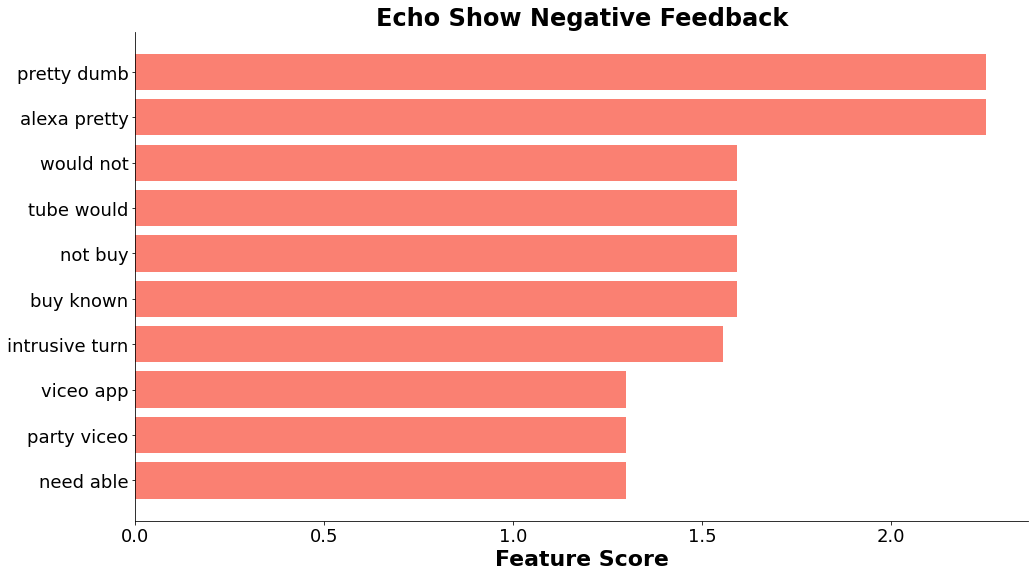

''

<Figure size 432x288 with 0 Axes>

In [30]:
scores = list(zip(tfidf_n.get_feature_names(), chi2score_n))
chi2_n = sorted(scores, key=lambda x:x[1])
topchi2_n = list(zip(*chi2_n[-10:]))
x_n=range(len(topchi2_n[1]))

fig, ax = plt.subplots(figsize=(16,9))
ax.barh(x_n, topchi2_n[1], align='center', alpha=1, color='salmon')

plt.title('Echo Show Negative Feedback', fontsize=24, weight='bold')

# x-axis
plt.xlabel("Feature Score", fontsize=22, weight='bold')
plt.xticks(fontsize=18)

#y-axis
labels = topchi2_n[0]
plt.yticks(x_n, labels, fontsize=18)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

fig = plt.gcf()
plt.show()
plt.draw()

# fig.savefig('Photos/echoshow_neg.jpg')
;

## Positive

In [31]:
tfidf = TfidfVectorizer(ngram_range=(2, 2))
X_tfidf = tfidf.fit_transform(pos_alexa['new_reviews'])
y = pos_alexa['rating']
chi2score = chi2(X_tfidf, y)[0]

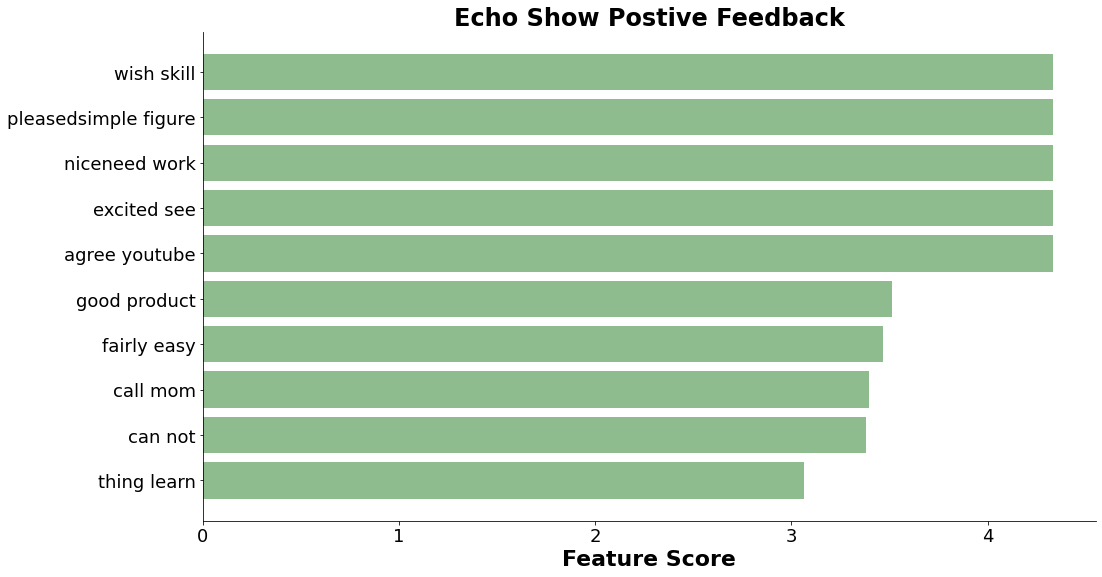

''

<Figure size 432x288 with 0 Axes>

In [32]:
scores = list(zip(tfidf.get_feature_names(), chi2score))
chi2 = sorted(scores, key=lambda x:x[1])
topchi2 = list(zip(*chi2[-10:]))
x=range(len(topchi2[1]))

fig, ax = plt.subplots(figsize=(16,9))
ax.barh(x,topchi2[1], alpha=1, color='darkseagreen')

plt.title('Echo Show Postive Feedback', fontsize=24, weight='bold')

# x-axis
plt.xlabel("Feature Score", fontsize=22, weight='bold')
plt.xticks(fontsize=18)

#y-axis
labels = topchi2[0]
plt.yticks(x, labels, fontsize=18)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

fig = plt.gcf()
plt.show()
plt.draw()

# fig.savefig('Photos/echoshow_positive.jpg')
;